#Task Details

## Every dataset has a story and this set is pulled from IMDb.com of all the Indian movies on the platform.
## Clean this data by removing missing values or adding average values this process will help to manipulate the data to help with your EDA.

    
#### -- Analyze data and provide some trends.
#### -- Year with best rating
#### -- Does length of movie have any impact with the rating?
#### -- Top 10 movies according to rating per year and overall.
#### -- Number of popular movies released each year.
#### -- Counting the number of votes which movies preformed better in rating per year and overall.
#### -- Any other trends or future prediction you may have
#### -- Which director directed the most movies
#### -- Which actor starred in the movie
#### -- Any other trends you can find

###### Thank you for viewing my dataset, looking forward to seeing some codes.

In [2]:
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('IMDb Movies India.csv', encoding = "ISO-8859-1")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [4]:
df.shape

(15509, 10)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,7919.0,5.841621,1.381777,1.1,4.9,6.0,6.8,10.0


In [6]:
df.nunique()

Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64

In [7]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

# Removing NULL values

In [8]:
df.dropna(subset='Year', inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
2,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
4,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
14976,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
14977,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
14978,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
14979,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


## Name

In [9]:
df.Name.isnull().sum()

0

# Year

In [10]:
df.Year = df.Year.str.replace(r'\D', '', regex=True)
df.Year = df.Year.astype('int')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Homecoming,2021,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
2,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,...And Once Again,2010,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
4,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
14976,Zulm Ko Jala Doonga,1988,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
14977,Zulmi,1999,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
14978,Zulmi Raj,2005,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
14979,Zulmi Shikari,1988,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


## Duration

In [11]:
df.Duration.fillna(0, inplace=True)
df.Duration = df['Duration'].apply(lambda x:x.strip(' min') if x!=0 else x)
df.Duration = df.Duration.astype(int)

## Filling null values in Duration with mean of Duration

In [12]:
mean_dur = df[df.Duration > 0].Duration.mean()
mean_dur = int(mean_dur.round())
mean_dur

128

In [13]:
df.Duration = df.Duration.apply(lambda x: mean_dur if x == 0 else x)

# Year vs Rating

In [14]:
year_rating = df.groupby('Year', as_index=False).agg({'Rating':'max'})
year_rating.dropna(how='any', inplace=True)
year_rating.reset_index(drop=True, inplace=True)
year_rating

,Year,Rating
0,1917,6.7
1,1931,6.2
2,1932,6.1
3,1933,7.2
4,1934,8.5
...,...,...
87,2017,9.4
88,2018,9.3
89,2019,9.4
90,2020,10.0


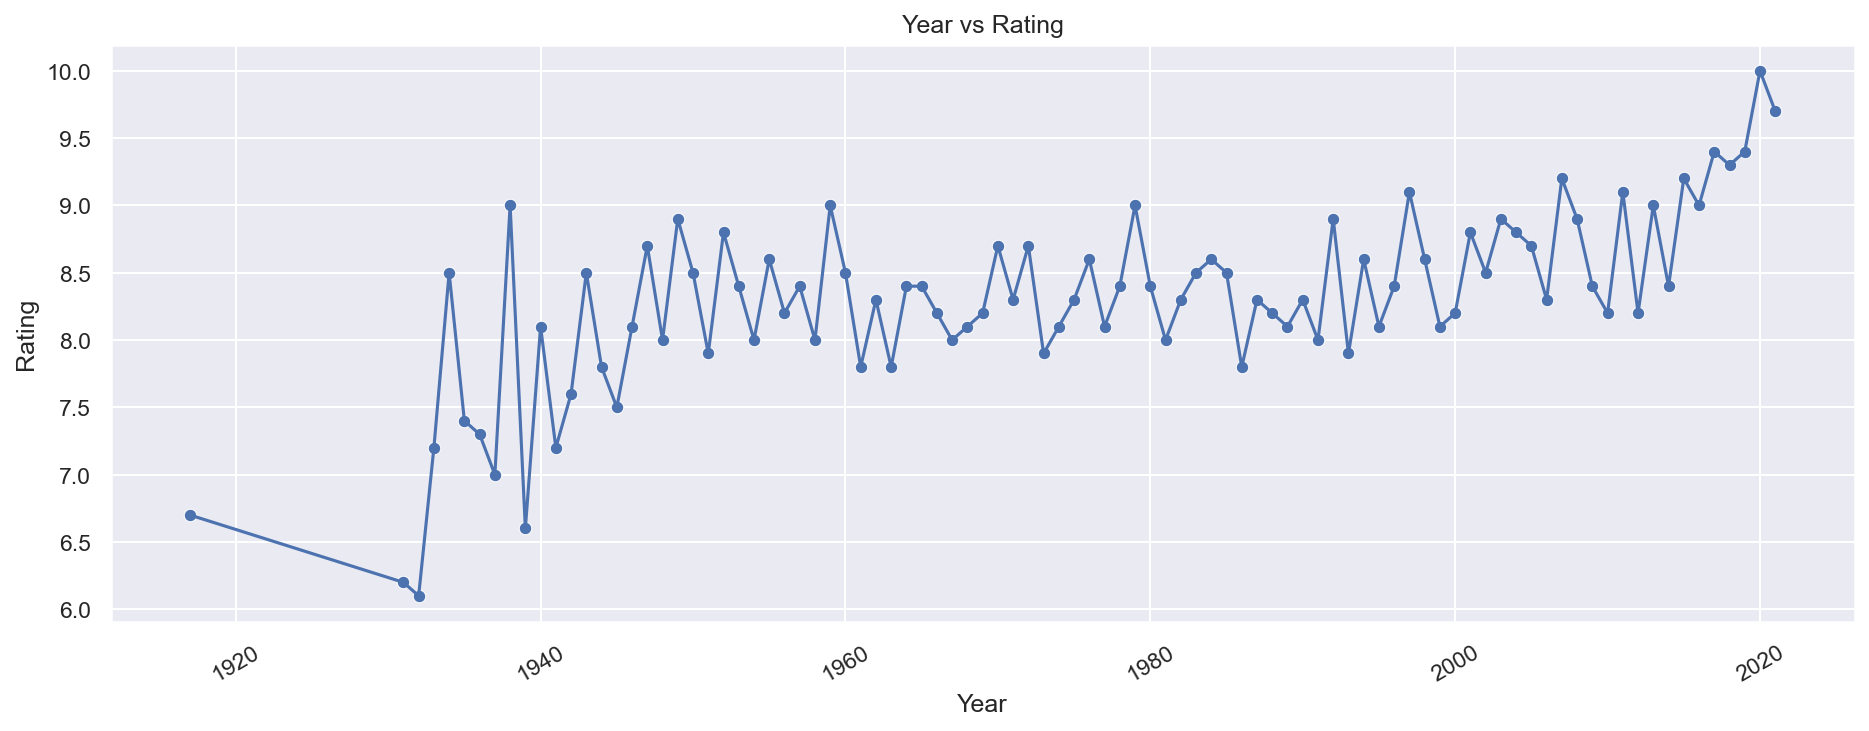

In [15]:
plt.figure(figsize=(15,5), dpi=150)

sns.lineplot(data=year_rating, x='Year', y='Rating')
sns.scatterplot(data=year_rating, x='Year', y='Rating')

plt.xticks(rotation=30)
plt.xlabel('Year')
plt.title('Year vs Rating')
plt.show()

## Movie with top rating

In [16]:
year_rating.sort_values(by='Rating', ascending=False, inplace=True)

df[(df['Year'] == year_rating.iloc[0,0]) & (df['Rating'] == year_rating.iloc[0,1])]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8088,Love Qubool Hai,2020,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari


## Top Rating movies in each year

In [17]:
a = pd.merge(df, year_rating, left_on=['Year', 'Rating'], right_on=['Year', 'Rating'], how='inner')
a.sort_values(by='Year', ignore_index=False)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
57,Lanka Dahan,1917,128,"Adventure, Drama, Fantasy",6.7,22,Dhundiraj Govind Phalke,Anna Salunke,Ganpat G. Shinde,D.D. Dabke
52,The Light of the World,1931,124,"Drama, Fantasy",6.2,112,Ardeshir Irani,Master Vithal,Zubeida,Jillo
51,Kalidas,1931,128,"Drama, History, Musical",6.2,12,H.M. Reddy,T.P. Rajalakshmi,P.G. Venkatesan,L.V. Prasad
9,Bharati Mata,1932,128,NaN,6.1,12,Pesi Karani,Hadi,Jamshedji,Jillo
2,Alif Laila,1933,128,Fantasy,7.2,37,Balwant Bhatt,Shanti Dave,Bashir Qawal,Zohra
...,...,...,...,...,...,...,...,...,...,...
89,Ram-Path,2017,128,Documentary,9.4,5,Ashish Dubey,Ishan Jacob,NaN,NaN
6,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
36,Gho Gho Rani,2019,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
62,Love Qubool Hai,2020,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari


# Duration vs Rating

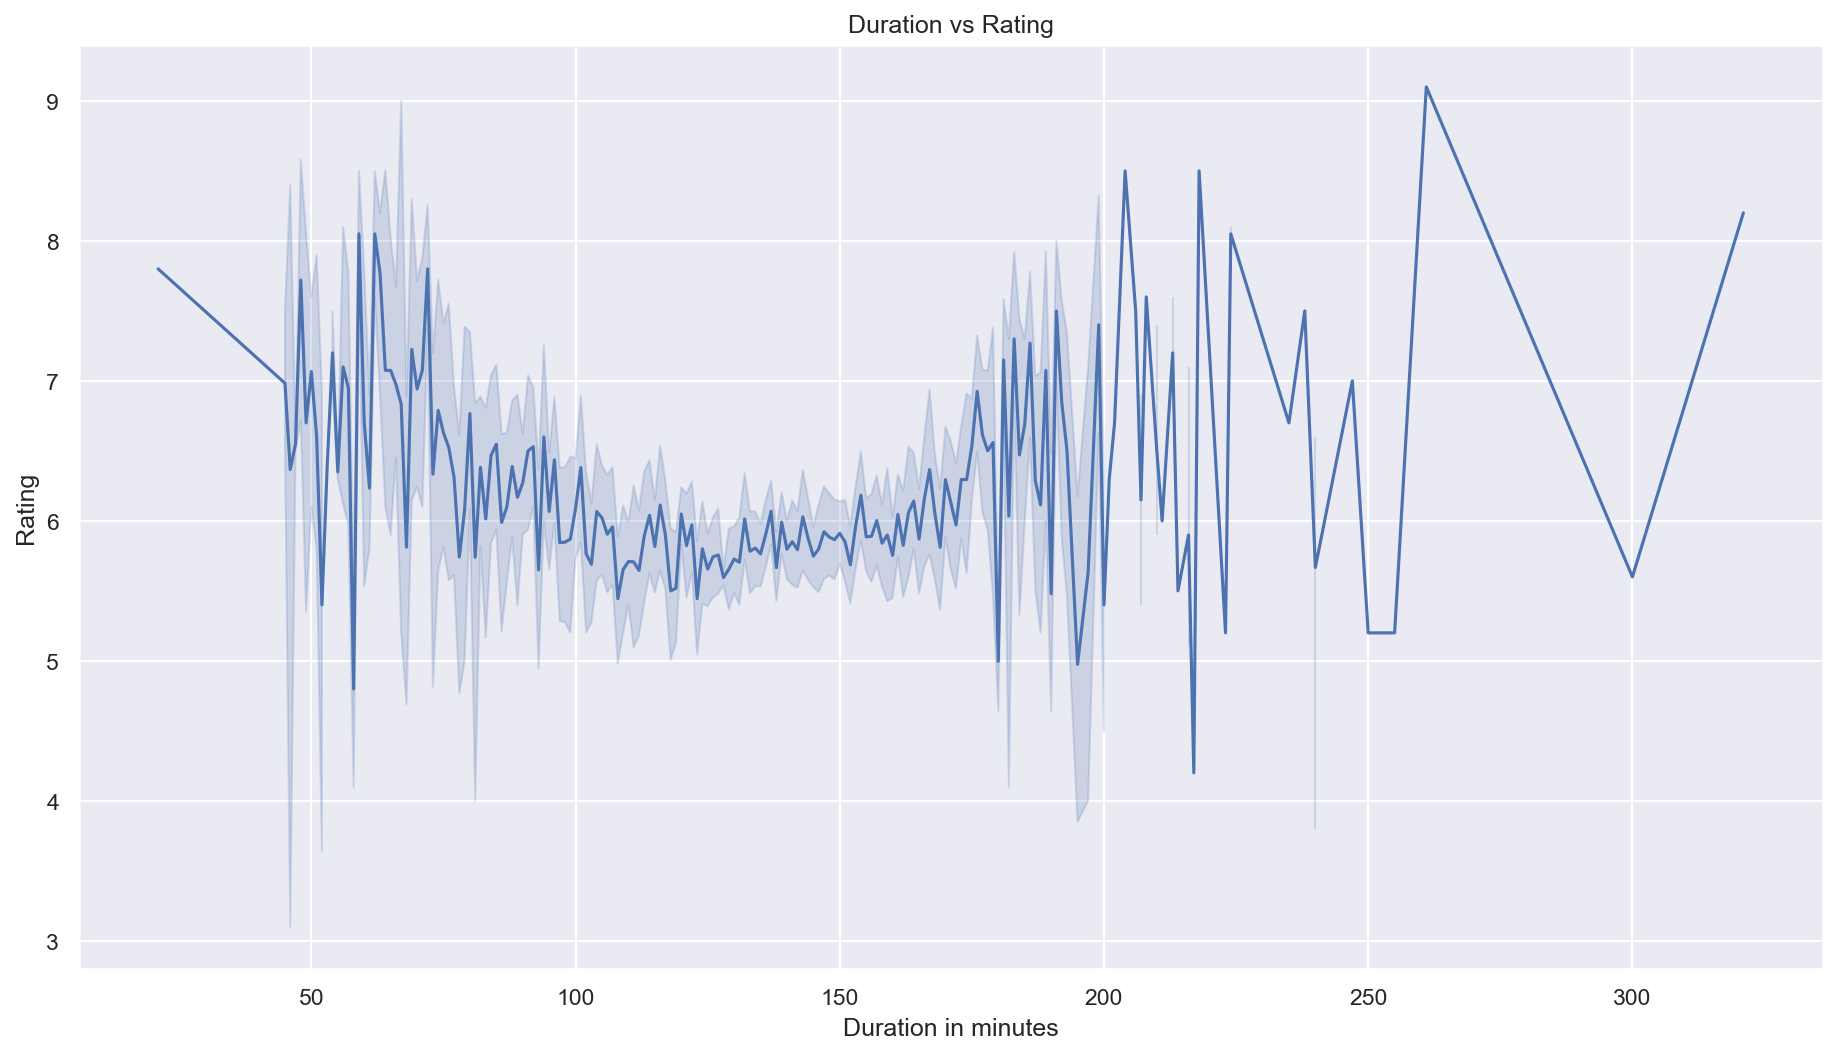

In [18]:
plt.figure(figsize=(15,8),dpi=150)

sns.lineplot(data=df, x='Duration', y='Rating')
# sns.scatterplot(data=df, x='Duration', y='Rating')

plt.xlabel('Duration in minutes')
plt.title('Duration vs Rating')
plt.show()

## Top 10 movies according to rating per year and overall.

In [19]:
yr = df.groupby(by = 'Year', as_index=False).apply(lambda x: x.nlargest(10, 'Rating'))[['Year','Name', 'Rating']]
yr.dropna(axis=0, subset='Rating', inplace=True)
yr.sort_values(by=['Year', 'Rating'], ascending=False, inplace=True)
yr.reset_index(drop=True, inplace=True)
yr.head(20)

,Year,Name,Rating
0,2021,Half Songs,9.7
1,2021,June,9.4
2,2021,Baikunth,9.3
3,2021,Love Sorries,9.3
4,2021,Refl3ct,9.3
5,2021,Secrets of Sinauli,9.3
6,2021,Cheer Haran,9.1
7,2021,Kaadan,9.1
8,2021,Borderlands,9.0
9,2021,Consequence Karma,9.0


In [20]:
yr.shape

(879, 3)

# No of movies with each Genre

Drama          7034
Action         3479
Romance        2401
Comedy         1950
Thriller       1621
Crime          1287
Family          928
Musical         578
Adventure       518
Mystery         492
Horror          488
Fantasy         444
Documentary     370
History         197
Biography       194
Animation       119
Music            85
Sport            66
Sci-Fi           53
War              42
News              9
Western           4
Reality-TV        3
Short             1
dtype: int64


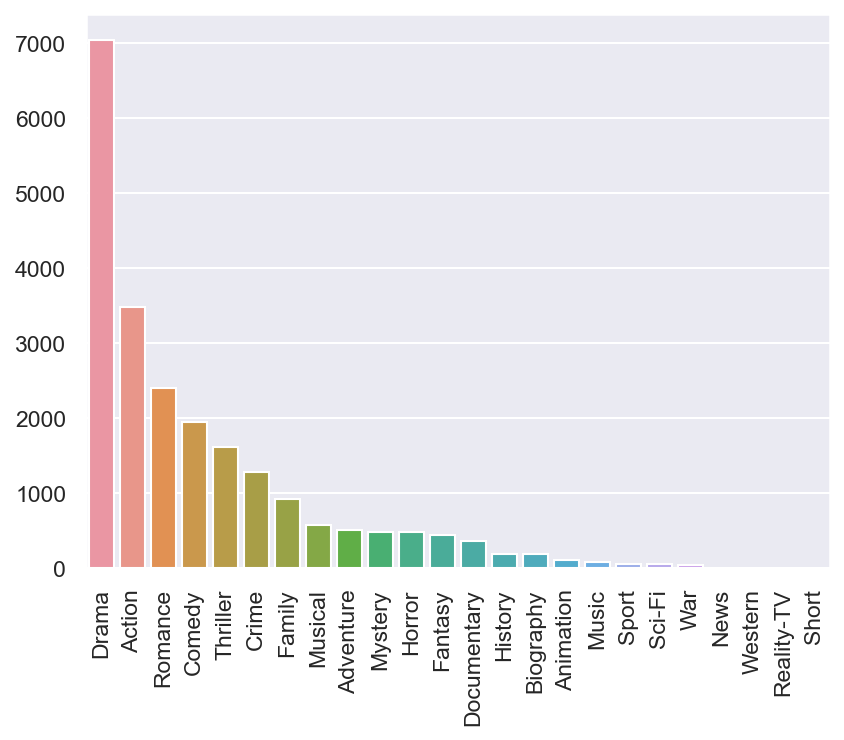

In [21]:
genre = df['Genre'].str.split(', ', expand=True).stack().value_counts()
print(genre)

plt.figure(dpi=150)

sns.barplot(x=genre.keys(), y=genre.values)

plt.xticks(rotation=90)
plt.show()


## Number of popular movies released each year

In [22]:
df.Votes = df.Votes.str.replace(',', '')
df.Votes = df.Votes.str.replace('$', '')
for val in df.Votes.to_list():
    if type(val) != float and not val.isnumeric():
        print(val)

5.16M


#### Votes has a value 5.16M which is to be converted to int

In [23]:
df.Votes[df.Votes == '5.16M'] = 5160000

#### Movies with highest number of votes each Year

In [38]:
votes = df.dropna(how='any', subset=['Votes'])[['Year', 'Name', 'Votes']]
votes.Votes = votes.Votes.astype('int')
votes = votes.groupby(by = 'Year', sort = False, as_index=False, dropna=True).apply(lambda x: x.nlargest(1, 'Votes'))
votes.sort_values(by='Year',ascending=False, inplace=True, ignore_index=True)
votes


,Year,Name,Votes
0,2021,Radhe,162455
1,2020,Dil Bechara,117377
2,2019,Chhichhore,38581
3,2018,Andhadhun,77901
4,2017,Raees,41441
...,...,...,...
87,1934,Piya Pyare,11
88,1933,Alif Laila,37
89,1932,Maya Machhindra,13
90,1931,The Light of the World,112


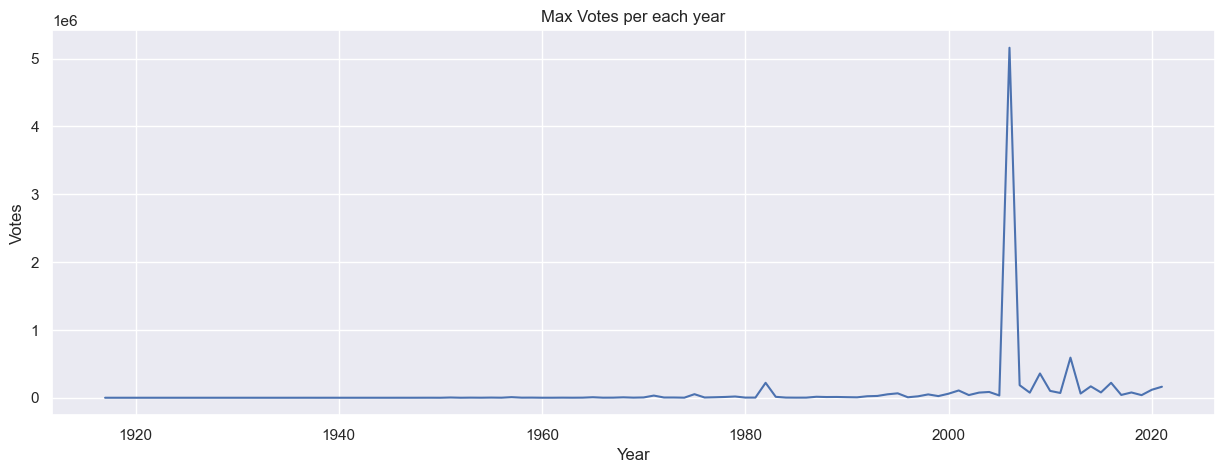

In [25]:
plt.figure(figsize=(15,5), dpi=100)
sns.lineplot(data=votes, x='Year', y='Votes')

plt.title('Max Votes per each year')
plt.show()

# Number of Movies by Director

In [51]:
director = df.dropna(how='any', subset='Director')[['Director', 'Name']]
director = director.groupby(by='Director', dropna=True)['Name'].count().reset_index(name='Count')
# director.sort_values(ascending=False, inplace=True)
director

,Director,Count
0,A B Arjun,1
1,A. Bhimsingh,18
2,A. Habib,1
3,A. Jagannathan,5
4,A. Karim,1
...,...,...
5659,Zoya Akhtar,7
5660,Zubair Khan,2
5661,Zubeida,2
5662,Zul Vellani,1


In [ ]:
sns.barplot(data=director, x='Director', y='Count')

<Axes: xlabel='Director', ylabel='Count'>